# 텍스트 마이닝

In [1]:
from konlpy.tag import Komoran,Kkma,Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. 텍스트 마이닝 과정

- 전처리 -> 불용어 제거 -> 토큰화 -> 어근 및 명사 등 추출 -> 벡터화 -> 모델 수립 및 학습 평가

## 2. 전처리

### 1) 토큰화

- 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(tokenization) & 정제(cleaning) & 정규화(normalization)하는 일

In [26]:
from nltk.tokenize import word_tokenize  
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))  

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


- word_tokenize는 Don't를 Do와 n't로 분리

In [27]:
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


- word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리하였다.

In [28]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


- 케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거하지만 don't나 jone's와 같은 경우는 보존

**토큰화시에 고려사항**
- 구두점, 특수 문자 단순 제외 x
- 줄임말과 단아 내에 띄어쓰기가 있는 경우

**Penn Treebank 규칙**

- 하이픈(-)으로 구성된 단어는 하나로 유지
- 아포스트로피(')로 접어가 함께하는 단어는 분리

In [29]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


#### 문장 토큰화

In [30]:
from nltk.tokenize import sent_tokenize
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [31]:
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


- 한국어에 대한 문장 토큰화 도구가 존재하지만 ADP 파이썬 패키지 리스트에는 없으므로 예제 X

#### 한국어 토큰화가 어려운 이유

- 교착어이다.(한국에는 조사가 존재한다. 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 함.)
- 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

#### 품사태깅

-  단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있기에 각 단어가 어떤 품사로 쓰였는지 구분해야한다. 이러한 작업을 품사태깅이라고 한다.

In [33]:
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

from nltk.tag import pos_tag
x=word_tokenize(text)
pos_tag(x)

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

- Tags에서 PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미.

In [35]:
okt=Okt()  
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
['코딩', '당신', '연휴', '여행']


- 1) morphs : 형태소 추출
- 2) pos : 품사 태깅(Part-of-speech tagging)
- 3) nouns : 명사 추출

형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 된다. 예를 들어서 속도를 중시한다면 메캅을 사용하면 된다.

### 2) 정제와 정규화

- 정제는 갖고 있는 코퍼스로부터 노이즈 데이터를 제거하는 것
- 정규화는 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

- 대,소문자 통합
- 불필요한 단어 제거(등장 빈도 적은 단어, 길이가 짧은 단어)

### 3) 어간 추출 및 표제어 추출

#### 3-1) 표제어 추출

- 표제어 : 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단
    - 예 : am, are, is는 서로 다른 스펠링이지만 그 뿌리 단어는 be라고 한다. be를 am, are, is의 표제어라고 한다.
    - 형태소로 추출하는 것이 가장 섬세한 방법(어간(단어의 핵심부분), 접사(추가적인 의미를 주는 부분))

In [36]:
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([n.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


-  표제어 추출은 어간 추출과는 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징

In [38]:
print(n.lemmatize('dies','v'))
print(n.lemmatize('watched', 'v'))

die
watch


- WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있다.

#### 3-2) 어간 추출

- 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 할 수 있다.
- 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있다.

In [39]:
from nltk.stem import PorterStemmer
s = PorterStemmer()
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words=word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [40]:
print([s.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


- 어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택

In [42]:
s=PorterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [41]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### 4) 불용어(Stopword)

- nltk를 이용하여 영어 불용어를 확인할 수 있다.

In [43]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10]  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [44]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


#### 한국어 불용어 제거

In [45]:
example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


### 6) 정수 인코딩

#### Counter 사용

In [47]:
from collections import Counter

In [46]:
sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [48]:
words = sum(sentences, [])
# 위 작업은 words = np.hstack(sentences)로도 수행 가능.
print(words)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [49]:
vocab = Counter(words) # 파이썬의 Counter 모듈을 이용하면 단어의 모든 빈도를 쉽게 계산할 수 있습니다.
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [50]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

#### NLTK의 FreqDist 사용하기

- 빈도수 계산 도구

In [51]:
from nltk import FreqDist

In [52]:
vocab = FreqDist(np.hstack(sentences))

In [53]:
vocab

FreqDist({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, ...})

#### 케라스(Keras)의 텍스트 전처리

In [54]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences) 

- fit_on_texts는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여

In [58]:
print(tokenizer.word_index,"\n")

print(tokenizer.word_counts)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13} 

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [60]:
print(tokenizer.texts_to_sequences(sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


- 각 단어를 이미 정해진 인덱스로 변환

### 6) 패딩

- 자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있기에 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있다.

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
encoded = tokenizer.texts_to_sequences(sentences)
print(encoded,"\n")

padding = pad_sequences(encoded)
print(padding)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]] 

[[ 0  0  0  0  0  1  5]
 [ 0  0  0  0  1  8  5]
 [ 0  0  0  0  1  3  5]
 [ 0  0  0  0  0  9  2]
 [ 0  0  0  2  4  3  2]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  2]
 [ 7  7  3  2 10  1 11]
 [ 0  0  0  1 12  3 13]]


- 뒤에 0을 채우고 싶다면 인자로 padding='post'
- max_len의 인자로 정수를 주면, 해당 정수로 모든 문서의 길이를 동일

## 3. 카운트 기반 단어 표현

### 1) Bag of Words

- 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

In [63]:
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
cv = CountVectorizer(max_features=1000,stop_words='english')
tdm_cv = cv.fit_transform(token_list)
cv_df = pd.DataFrame({"Word":cv.get_feature_names(),"Count" : tdm_cv.sum(axis = 0).tolist()[0]})

In [ ]:
wordcloud = cv_df.sort_values(by='Count',ascending = False)[:50]
wc = WordCloud(background_color='white',width = 400, height=200,
         font_path = 'C:/Windows/Fonts/gulim.ttc')
wc.fit_words(dict(zip(wordcloud['Word'],wordcloud['Count'])))``

In [ ]:
wc.to_image()

In [ ]:
cv = CountVectorizer(max_features=1000,stop_words='english')
tdm_cv = cv.fit_transform(token_list)
cv_df = pd.DataFrame({"Word":cv.get_feature_names(),"Count" : tdm_cv.sum(axis = 0).tolist()[0]})

In [ ]:
wordcloud = cv_df.sort_values(by='Count',ascending = False)[:50]
wc = WordCloud(background_color='white',width = 400, height=200,
         font_path = 'C:/Windows/Fonts/gulim.ttc')
wc.fit_words(dict(zip(wordcloud['Word'],wordcloud['Count'])))

### 2) TF-IDF

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) 

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# 텍스트를 Input으로 넣어서 토큰화시키고 토큰화된 단어들의 원형들을 리스트로 담아 반환
def LemNormalize(text):
    # .translate인자에 구두점 dict넣어주어서 구두점 삭제해준 상태로 토큰화시키기!
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

TfidfVectorizer 파라미터

- min_df = 빈도수 이하 제거
- max_df = 빈도수 이상 제거

## 4. 토픽 모델링

### 1) LDA

In [66]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", filename="abcnews-date-text.csv")
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

In [71]:
import nltk

In [72]:
text = data[['headline_text']]
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

In [73]:
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])

In [74]:
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                       headline_text
0       [aba, decide, community, broadcast, licence]
1      [act, fire, witness, must, aware, defamation]
2      [g, call, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


- 표제어 추출

In [75]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object


- 길이가 3이하인 단어에 대해서 제거

#### TF-IDF

In [76]:
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc

In [77]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(text['headline_text'])

In [80]:
X.shape

(1082168, 1000)

In [82]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(X)

In [83]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[1.00001533e-01 1.00001269e-01 1.00004179e-01 ... 1.00006124e-01
  1.00003111e-01 1.00003064e-01]
 [1.00001199e-01 1.13513398e+03 3.50170830e+03 ... 1.00009349e-01
  1.00001896e-01 1.00002937e-01]
 [1.00001811e-01 1.00001151e-01 1.00003566e-01 ... 1.00002693e-01
  1.00002061e-01 7.53381835e+02]
 ...
 [1.00001065e-01 1.00001689e-01 1.00003278e-01 ... 1.00006721e-01
  1.00004902e-01 1.00004759e-01]
 [1.00002401e-01 1.00000732e-01 1.00002989e-01 ... 1.00003517e-01
  1.00001428e-01 1.00005266e-01]
 [1.00003427e-01 1.00002313e-01 1.00007340e-01 ... 1.00003732e-01
  1.00001207e-01 1.00005153e-01]]
(10, 1000)


In [84]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('government', 8725.19), ('sydney', 8393.29), ('queensland', 7720.12), ('change', 5874.27), ('home', 5674.38)]
Topic 2: [('australia', 13691.08), ('australian', 11088.95), ('melbourne', 7528.43), ('world', 6707.7), ('south', 6677.03)]
Topic 3: [('death', 5935.06), ('interview', 5924.98), ('kill', 5851.6), ('jail', 4632.85), ('life', 4275.27)]
Topic 4: [('house', 6113.49), ('2016', 5488.19), ('state', 4923.41), ('brisbane', 4857.21), ('tasmania', 4610.97)]
Topic 5: [('court', 7542.74), ('attack', 6959.64), ('open', 5663.0), ('face', 5193.63), ('warn', 5115.01)]
Topic 6: [('market', 5545.86), ('rural', 5502.89), ('plan', 4828.71), ('indigenous', 4223.4), ('power', 3968.26)]
Topic 7: [('charge', 8428.8), ('election', 7561.63), ('adelaide', 6758.36), ('make', 5658.99), ('test', 5062.69)]
Topic 8: [('police', 12092.44), ('crash', 5281.14), ('drug', 4290.87), ('beat', 3257.58), ('rise', 2934.92)]
Topic 9: [('fund', 4693.03), ('labor', 4047.69), ('national', 4038.68), ('council', 40

### 2) LSA

- BOW에 기반한 DTM, TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있다.

In [65]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [66]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [69]:
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])


In [70]:
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

- TF-IDF는 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용하기에 역토큰화 시행

In [71]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape

(11314, 1000)

In [72]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [73]:
terms = vectorizer.get_feature_names() 

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

- LSA는 쉽고 빠르게 구현 가능하고 단어의 잠재적 의미를 이끌어낼 수 있어서 문서의 유사도 계산 등에서 좋은 성능을 보이는 장점을 가진다.
- 새로운 데이터를 추가하여 계산하려고 하면 보통 처음부터 다시 계산해야한다.

## 4. 딥러닝으로 텍스트 분류하기

### 1) 스팸메일 분류

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('spam.csv',encoding='latin1')

In [6]:
data = data.iloc[:,:2]

In [9]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data.drop_duplicates(subset=['v2'], inplace=True)

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
print(data.groupby('v1').size().reset_index(name='count'))

   v1  count
0   0   4516
1   1    653


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
data.reset_index(drop = True, inplace = True)

In [24]:
import re

In [30]:
data['v2'] = data['v2'].apply(lambda x : re.sub('[^a-zA-Z ]','',x)).str.replace("  "," ")

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
stop_words = set(stopwords.words('english')) 
df = []
for sentence in data['v2'] :
    word_tokens = word_tokenize(sentence)
    temp_X = [word for word in word_tokens if word not in stop_words and len(word)>1]
    df.append(temp_X)

In [64]:
data['v2'] = [" ".join(v) for v in df]

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
X_data = data['v2']
y_data = data['v1']
print(len(X_data),len(y_data))

5169 5169


In [67]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) # 5169개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) 

In [69]:
word_to_index = tokenizer.word_index

In [70]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4970
단어 집합(vocabulary)에서 희귀 단어의 비율: 58.511890746409236
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.478600042167404


In [71]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8495


In [72]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


메일의 최대 길이 : 81
메일의 평균 길이 : 9.175856


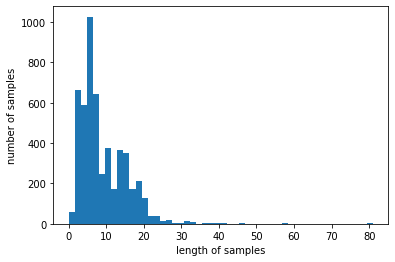

In [73]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [74]:
max_len = 81
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

훈련 데이터의 크기(shape):  (5169, 81)


In [75]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장

In [76]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [77]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)


Epoch 1/4
52/52 [==============================] - 1s 15ms/step - loss: 0.3439 - acc: 0.8715 - val_loss: 0.1895 - val_acc: 0.9504
Epoch 2/4
52/52 [==============================] - 1s 12ms/step - loss: 0.1336 - acc: 0.9661 - val_loss: 0.1031 - val_acc: 0.9661
Epoch 3/4
52/52 [==============================] - 1s 12ms/step - loss: 0.0671 - acc: 0.9822 - val_loss: 0.0776 - val_acc: 0.9722
Epoch 4/4
52/52 [==============================] - 1s 12ms/step - loss: 0.3169 - acc: 0.8830 - val_loss: 0.1387 - val_acc: 0.9480


In [78]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 3ms/step - loss: 0.1319 - acc: 0.9594

 테스트 정확도: 0.9594


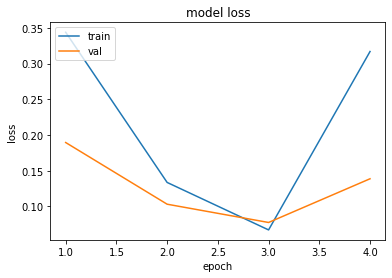

In [79]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
train_over, y_over = smote.fit_sample(train,y)

### 2) 한글 텍스트 처리 예제 - 네이버 영화 리뷰 감성 분석

In [4]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
print('훈련용 리뷰 개수 : {}'.format(len(train_data)))

훈련용 리뷰 개수 : 150000


In [6]:
train_data['document'].nunique()

146182

- 15만개 샘플 중 약 4000개가 중복으로 존재하기에 중복된 것들을 제거

In [7]:
train_data.drop_duplicates(subset=['document'],inplace = True)

<AxesSubplot:>

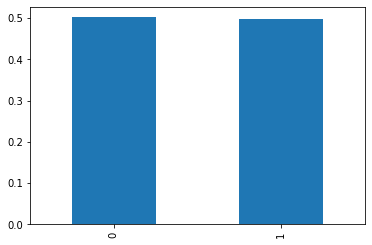

In [9]:
train_data['label'].value_counts(normalize = True).plot.bar()

In [10]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


- 이진 label이고 두 값이 balance하게 맞춰져있다고 볼 수 있다.

In [14]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

- 결측값 존재한다.

In [15]:
train_data.loc[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1


In [16]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


- 이제 정규표현식을 이용하여 한글을 제외한 문자들을 제외할 것이다.

In [18]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

- 공백만 있거나 빈 값을 가진 행이 존재할 수 있으므로 파악 후 결측값으로 처리한 다음 제외

In [22]:
train_data['document'] = train_data['document'].str.replace('^ +','')

train_data['document'].replace('',np.nan,inplace = True)

print(train_data['document'].isnull().sum())

789


In [24]:
train_data.loc[train_data['document'].isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [26]:
train_data = train_data.dropna(how = 'any')
train_data.reset_index(drop = True, inplace = True)

In [28]:
test_data.drop_duplicates(subset = ['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


- test 데이터도 똑같이 진행

In [30]:
test_data.reset_index(drop = True, inplace = True)

In [31]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [32]:
okt = Okt()

In [34]:
X_train = []

for sentence in train_data['document'] :
    temp_X = okt.morphs(sentence, stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

In [36]:
X_train[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [37]:
X_test = []
for sentence in test_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [41]:
len(tokenizer.word_index)

43752

- 단어가 43000개 넘게 존재한다. 너무 많기에 빈도수를 일단 파악해본다

In [43]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0 # threshold보다 등장 빈도수가 작은 단어 개수 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 # threshold보다 등장 빈도수가 작은 단어의 등장 빈도수의 총합

for key, value in tokenizer.word_counts.items() :
    total_freq = total_freq + value
    
    if (value < threshold) : 
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [44]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


- 2번이하인 단어들이 단어 집합에서 절반 이상을 차지하고 있다.
- 그리고 비중은 1.87%정도 밖에 되지 않기에 정수 인코딩 과정에서 배제

In [46]:
vocab_size = total_cnt - rare_cnt + 1

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [48]:
X_train[:5]

[[50, 454, 16, 260, 659],
 [933, 457, 41, 602, 1, 214, 1449, 24, 961, 675, 19],
 [386, 2444, 2315, 5671, 2, 222, 9],
 [6492, 105, 8118, 218, 56, 4, 26, 3603],
 [1023, 29, 9145, 24, 833, 1, 2579, 21, 1108, 240, 14243, 1076, 254, 240]]

- 전체 데이터에서 빈도수가 낮은 단어들을 삭제했으니 빈도수 낮은 단어로 구성되어있는 샘플들은 empty sample이 되었기에 이를 제거해준다

In [49]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [52]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145162
145162


리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.812485361182679


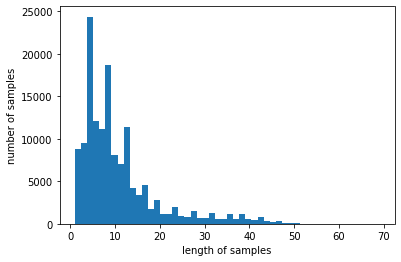

In [53]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

- 가장 긴 리뷰의 길이는 69이며 평균 11자내외의 길이를 가지고 있다.
- 최적의 max_len을 찾아 max_len을 정한다.

In [54]:
def below_threshold_len(max_len, nested_list) :
    cnt = 0
    for s in nested_list :
        if(len(s) <= max_len) :
            cnt += 1
            
    print('전체 샘플 중 길이가 {}이하인 샘플의 비율 : {}'.format(max_len, (cnt/ len(nested_list))*100))

In [55]:
below_threshold_len(30,X_train)

전체 샘플 중 길이가 30이하인 샘플의 비율 : 94.31944999380003


- 전체 X_train 데이터에서 94%정도가 30이하의 길이를 가지고 있기에 샘플의 길이를 30으로 맞춘다.

In [57]:
X_train = pad_sequences(X_train, maxlen = 30)
X_test = pad_sequences(X_test, maxlen = 30)

In [58]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [62]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/10
1935/1936 [============================>.] - ETA: 0s - loss: 0.3645 - acc: 0.8383
Epoch 00001: val_acc improved from -inf to 0.84852, saving model to best_model.h5
1936/1936 [==============================] - 55s 28ms/step - loss: 0.3646 - acc: 0.8383 - val_loss: 0.3491 - val_acc: 0.8485
Epoch 2/10
1935/1936 [============================>.] - ETA: 0s - loss: 0.3215 - acc: 0.8611
Epoch 00002: val_acc improved from 0.84852 to 0.85875, saving model to best_model.h5
1936/1936 [==============================] - 55s 29ms/step - loss: 0.3216 - acc: 0.8611 - val_loss: 0.3307 - val_acc: 0.8587
Epoch 3/10
1935/1936 [============================>.] - ETA: 0s - loss: 0.2981 - acc: 0.8744
Epoch 00003: val_acc improved from 0.85875 to 0.86116, saving model to best_model.h5
1936/1936 [==============================] - 57s 30ms/step - loss: 0.2980 - acc: 0.8744 - val_loss: 0.3301 - val_acc: 0.8612
Epoch 4/10
1935/1936 [============================>.] - ETA: 0s - loss: 0.2798 - acc: 0.8843
E

In [63]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 9s 6ms/step - loss: 0.3362 - acc: 0.8569

 테스트 정확도: 0.8569


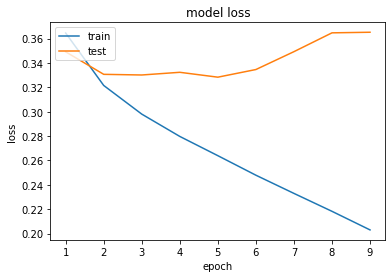

In [64]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 5. 코사인 유사도

- -1 ~ 1사이의 값을 가지게 되고 1에 가까울수록 유사도가 높다고 판단

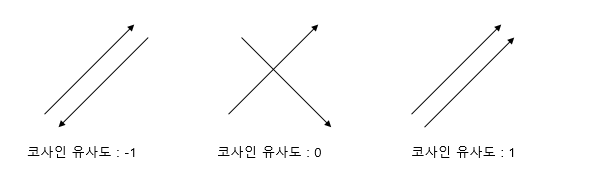

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [76]:
df = pd.read_csv('movies_metadata.csv',low_memory=False)

In [ ]:
df = df.head(10000)

In [86]:
df['overview'].isnull().sum()

29

In [88]:
df['overview'] = df['overview'].fillna('')

In [89]:
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['overview'])
print(tfidf_matrix.shape)

(10000, 32350)


In [90]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [95]:
indices = pd.Series(df.index,index=df['title']).drop_duplicates()

In [96]:
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [99]:
indices

title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                                ... 
Miracle in Milan                9995
Before the Fall                 9996
The Frisco Kid                  9997
Onmyoji: The Yin Yang Master    9998
State Property 2                9999
Length: 10000, dtype: int64

In [109]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [110]:
get_recommendations('Batman Returns')

3095                 Batman: Mask of the Phantasm
150                                Batman Forever
9230           Batman Beyond: Return of the Joker
585                                        Batman
9169    The Batman Superman Movie: World's Finest
1491                               Batman & Robin
9139                 Batman & Mr. Freeze: SubZero
9207                     An Extremely Goofy Movie
456                                       Go Fish
443                                      Fearless
Name: title, dtype: object

## 비지도 감성분석

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
senti_analyzer = SentimentIntensityAnalyzer()
senti_analyzer.polarity_scores(data['token'][0])

- neg는 부정 감성 지수, 'neu'는 중립적인 감성 지수, 'pos'는 긍정 감성 지수, 그리고 compound는 neg, neu, pos score를 적절히 조합해 -1에서 1사이의 감성 지수를 표현한 값입니다.

- 보통 0.1이상이면 긍정 그 이하이면 부정

- 주의점 : 임베딩할때 int말고 float로 바꿔주기!

## 텍스트 감성 분석 진행 방법

- 데이터 중복 제거
- 정규표현식을 통해 영어면 영어, 한글이면 한글만 남기기
- 불용어처리
- 토큰화
- 토큰화된 길이 파악하여 패딩 작업
- **작업후 데이터 타입이 int면 float로 바꾸기**
- vocab_size는 단어 갯수 +1로 지정
- 모델링
- 정확도 및 그래프 보여주기

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
word_count_dict = dict(zip(word_df['단어'], word_df['빈도']))
word_tfidf_dict = dict(zip(word_tfidf['단어'], word_tfidf['tfidf']))
for area in review_df['지역'].unique():
    
    filtered = list(review_df.loc[review_df['지역']==area].index)
    area_df = pd.DataFrame({'단어': cv.get_feature_names(),
                            '빈도': tdm_cv[filtered].sum(axis=0).flat})
    wc = WordCloud(background_color='white', width=400, height=200,
              font_path = 'C:/Windows/Fonts/gulim.ttc')
    cloud_tfidf = wc.fit_words(dict(zip(area_df['단어'], area_df['빈도'])))
    cloud_tfidf.to_image()
    cloud_tfidf.to_file("{} WordCloud.jpg".format(area))